In [6]:
import matplotlib.pyplot as plt
import json
from collections import defaultdict

def struct_of_exp(exp):
    ans = []
    for token in exp.split():
        if token[0] == '(':
            ans.append(token)
        elif token[-1] == ')':
            n = token.count(')')
            ans.append('x')
            ans.append(token[-n:])
        else:    
            ans.append('x')
    return ans

correct_struct = defaultdict(int)
num_struct = defaultdict(int)
results = json.load(open('data/baseline.json', 'r'))
for result in results:
    num_struct[result['question_type']] += 1
    if struct_of_exp(result['s_expression']) == struct_of_exp(result['gene_exp']):
        correct_struct[result['question_type']] += 1

acc = dict(sorted([(question_type, correct_struct[question_type] / num_struct[question_type]) for question_type in num_struct], key=lambda x:x[0], reverse=True))
acc

{'Verification (Boolean) (All) [Verification|one entity, multiple entities (as object) referred indirectly]': 0.56,
 'Verification (Boolean) (All) [Verification|3 entities, all direct, 2 are query entities]': 0.8,
 'Verification (Boolean) (All) [Verification|3 entities, 2 direct, 2(direct) are query entities, subject is indirect]': 0.7,
 'Verification (Boolean) (All) [Verification|2 entities, one direct and one indirect, subject is indirect]': 0.72,
 'Verification (Boolean) (All) [Verification|2 entities, one direct and one indirect, object is indirect]': 0.7,
 'Verification (Boolean) (All) [Verification|2 entities, both direct]': 0.44,
 'Simple Question (Ellipsis) [only subject is changed, parent and predicate remains same]': 0.78,
 'Simple Question (Ellipsis) [Incomplete|object parent is changed, subject and predicate remain same]': 0.78,
 'Simple Question (Direct) [Simple Question|Single Entity]': 0.64,
 'Simple Question (Direct) [Simple Question|Mult. Entity|Indirect]': 0.0,
 'Simp

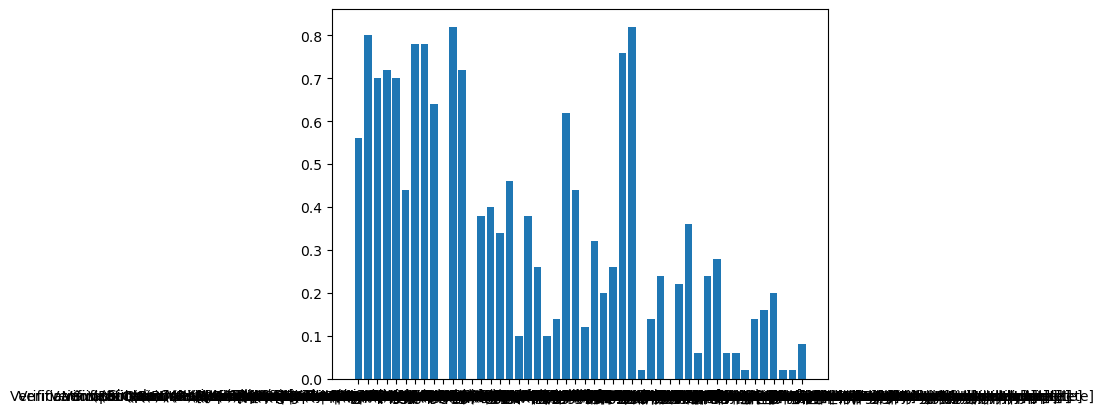

In [7]:
import matplotlib.pyplot as plt
plt.bar(acc.keys(), acc.values(), align='center')
plt.show()